In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# We obtain the experimental data from [1]

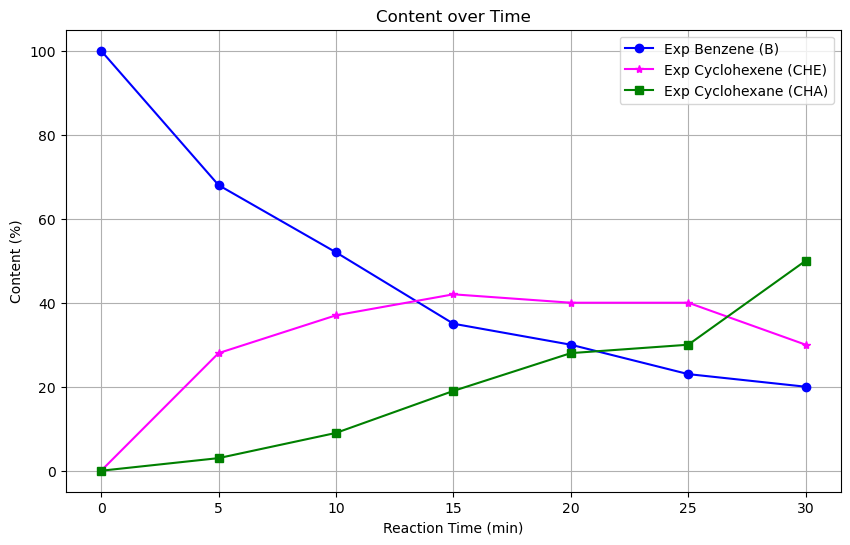

In [2]:
# Create a DataFrame from the provided table
data = pd.DataFrame({
    'Reaction Time (min)': [0, 5, 10, 15, 20, 25, 30],
    'Benzene (B)': [1.00, 0.68, 0.52, 0.35, 0.30, 0.23, 0.20],
    'Cyclohexene (CHE)': [0.00, 0.28, 0.37, 0.42, 0.40, 0.40, 0.30],
    'Cyclohexane (CHA)': [0.00, 0.03, 0.09, 0.19, 0.28, 0.30, 0.50]
})

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(data['Reaction Time (min)'], data['Benzene (B)']*100, marker='o', color='blue', label='Exp Benzene (B)')
plt.plot(data['Reaction Time (min)'], data['Cyclohexene (CHE)']*100, marker='*', color='magenta', label='Exp Cyclohexene (CHE)')
plt.plot(data['Reaction Time (min)'], data['Cyclohexane (CHA)']*100, marker='s', color='green', label='Exp Cyclohexane (CHA)')

plt.xlabel('Reaction Time (min)')
plt.ylabel('Content (%)')
plt.title('Content over Time')
plt.legend()
plt.grid(True)
plt.show()

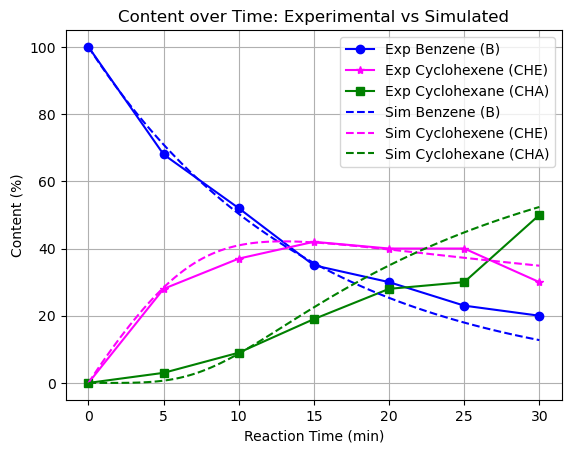

In [3]:
# Original Kinetic constants
# k1 = 5.81e-2  # mol/min
# k2 = 75.68e-2  # mol/L.min

# Modified kinetic constants
k1 = 6.866877540890461e-2 # mol / min
k2 = 89.4993994653033e-2 # mol/L.min

alpha = 4

# Initial concentrations
B_initial = 1.00  # Benzene
CHE_initial = 0.00  # Cyclohexene
CHA_initial = 0.00  # Cyclohexane
initial_conditions = [B_initial, CHE_initial, CHA_initial]

# Time points
time_points = np.linspace(0, 30, 100)  # from 0 to 30 minutes

# Differential equations
def reaction_rates(concentrations, t, k1, k2):
    B, CHE, CHA = concentrations
    B = max(B, 0)   # Ensuring B doesn't go below 0
    CHE = max(CHE, 0)   # Ensuring CHE doesn't go below 0
    CHA = max(CHA, 0)   # Ensuring CHA doesn't go below 0

    dBdt = -k1 * B
    dCHEdt = k1 * B - k2 * (CHE**alpha)
    dCHAdt = k2 * (CHE**alpha)

    return [dBdt, dCHEdt, dCHAdt]

# Solving the equations
solution = odeint(reaction_rates, initial_conditions, time_points, args=(k1, k2))
B_solution, CHE_solution, CHA_solution = solution.T

# Experimental data
plt.plot(data['Reaction Time (min)'], data['Benzene (B)']*100, 'o-', color='blue', label='Exp Benzene (B)')
plt.plot(data['Reaction Time (min)'], data['Cyclohexene (CHE)']*100, '*-', color='magenta', label='Exp Cyclohexene (CHE)')
plt.plot(data['Reaction Time (min)'], data['Cyclohexane (CHA)']*100, 's-', color='green', label='Exp Cyclohexane (CHA)')

# Simulated data
plt.plot(time_points, B_solution * 100, '--', color='blue', label='Sim Benzene (B)')
plt.plot(time_points, CHE_solution * 100, '--', color='magenta', label='Sim Cyclohexene (CHE)')
plt.plot(time_points, CHA_solution * 100, '--', color='green', label='Sim Cyclohexane (CHA)')

plt.xlabel('Reaction Time (min)')
plt.ylabel('Content (%)')
plt.title('Content over Time: Experimental vs Simulated')
plt.legend()
plt.grid(True)
plt.show()

# We have found that the chemical reaction equation should be: 

$$
\dfrac{d C_{Bz}}{dt} = k_1 C_{Bz}
$$

$$
\dfrac{d C_{CHE}}{dt} = k_1 C_{Bz} - k_2 C_{CHE}^4
$$

$$
\dfrac{d C_{CHA}}{dt} = k_2 C_{CHE}^4
$$

where $k_1 = 5.81 (10^{-2} mol / min)$ and $k_2 = 75.68 (10^{-2} mol / L min)$



## We have used [2] to help us to do a sensitivity analysis and to estimate the Arrenhius equation that would fit the experimental data and we have modified the kinetic constants accordingly when the temperature is at 423 [K]. 


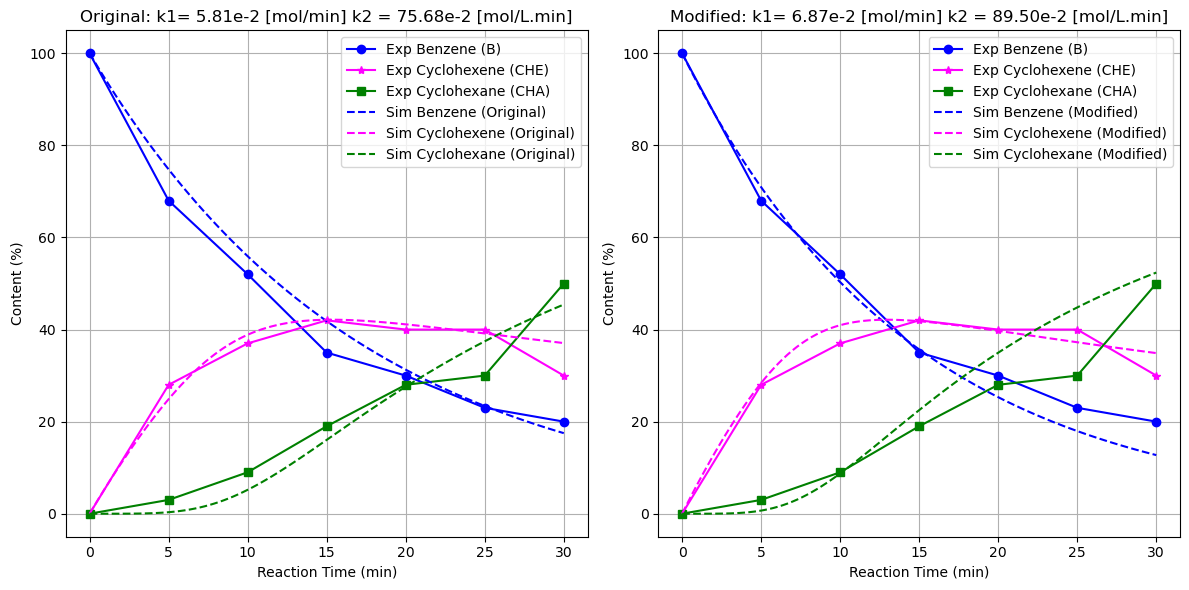

In [4]:
# Original Kinetic constants
k1_original = 5.81e-2  # mol/min
k2_original = 75.68e-2  # mol/L.min

# Modified kinetic constants
k1_modified = 6.87e-2 # mol/min
k2_modified = 89.50e-2 # mol/L.min

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Solve for original constants and plot
solution_original = odeint(reaction_rates, initial_conditions, time_points, args=(k1_original, k2_original))
B_original, CHE_original, CHA_original = solution_original.T

ax1.plot(data['Reaction Time (min)'], data['Benzene (B)']*100, 'o-', color='blue', label='Exp Benzene (B)')
ax1.plot(data['Reaction Time (min)'], data['Cyclohexene (CHE)']*100, '*-', color='magenta', label='Exp Cyclohexene (CHE)')
ax1.plot(data['Reaction Time (min)'], data['Cyclohexane (CHA)']*100, 's-', color='green', label='Exp Cyclohexane (CHA)')
ax1.plot(time_points, B_original * 100, '--', color='blue', label='Sim Benzene (Original)')
ax1.plot(time_points, CHE_original * 100, '--', color='magenta', label='Sim Cyclohexene (Original)')
ax1.plot(time_points, CHA_original * 100, '--', color='green', label='Sim Cyclohexane (Original)')
ax1.set_xlabel('Reaction Time (min)')
ax1.set_ylabel('Content (%)')
ax1.set_title('Original: k1= 5.81e-2 [mol/min] k2 = 75.68e-2 [mol/L.min]')
ax1.legend()
ax1.grid(True)

# Solve for modified constants and plot
solution_modified = odeint(reaction_rates, initial_conditions, time_points, args=(k1_modified, k2_modified))
B_modified, CHE_modified, CHA_modified = solution_modified.T

ax2.plot(data['Reaction Time (min)'], data['Benzene (B)']*100, 'o-', color='blue', label='Exp Benzene (B)')
ax2.plot(data['Reaction Time (min)'], data['Cyclohexene (CHE)']*100, '*-', color='magenta', label='Exp Cyclohexene (CHE)')
ax2.plot(data['Reaction Time (min)'], data['Cyclohexane (CHA)']*100, 's-', color='green', label='Exp Cyclohexane (CHA)')
ax2.plot(time_points, B_modified * 100, '--', color='blue', label='Sim Benzene (Modified)')
ax2.plot(time_points, CHE_modified * 100, '--', color='magenta', label='Sim Cyclohexene (Modified)')
ax2.plot(time_points, CHA_modified * 100, '--', color='green', label='Sim Cyclohexane (Modified)')
ax2.set_xlabel('Reaction Time (min)')
ax2.set_ylabel('Content (%)')
ax2.set_title('Modified: k1= 6.87e-2 [mol/min] k2 = 89.50e-2 [mol/L.min]')
ax2.legend()
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

where the resulting Arrenhius equations are as follows: 

$$
k_1 = 734.95 \left[\dfrac{mol}{min}\right] \cdot exp \left[\dfrac{-32630[\frac{J}{mol}]}{RT}\right]
$$

$$
k_2 = 478.33 \left[\dfrac{mol}{L \cdot min}\right] \cdot exp \left[\dfrac{-22090 [\frac{J}{mol}]}{RT}\right]
$$

# References

[1]: Y. Song, S. Zhi, G. Fan, L. Yang, and F. Li, “Regulating Surface‐Interface Structures of Zn‐Incorporated LiAl‐LDH Supported Ru Catalysts for Efficient Benzene Hydrogenation to Produce Cyclohexene,” Chemcatchem, vol. 14, no. 14, May 2022, doi: https://doi.org/10.1002/cctc.202200125.

[2]: D. Zhang and G. Liu, “Heat exchanger network integration of a hydrogenation process of benzene to cyclohexene considering the reactor conversion,” Chemical engineering transactions, vol. 61, pp. 283–288, Oct. 2017, doi: https://doi.org/10.3303/cet1761045.